                0           1           2           3
count  306.000000  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144    1.264706
std     10.803452    3.249405    7.189654    0.441899
min     30.000000   58.000000    0.000000    1.000000
25%     44.000000   60.000000    0.000000    1.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     60.750000   65.750000    4.000000    2.000000
max     83.000000   69.000000   52.000000    2.000000


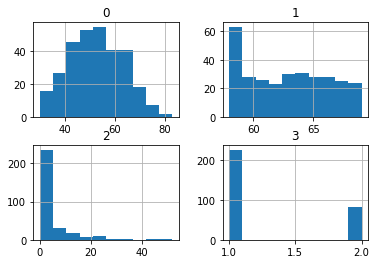

In [20]:
# show summary statistics and plots of the haberman dataset
from pandas import read_csv
from matplotlib import pyplot
# define the location of the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.csv'
# load the dataset
df = read_csv(url, header=None)
# show summary statistics
print(df.describe())
# plot histograms
df.hist()
pyplot.show()

In [33]:
# summarize the class ratio of the haberman dataset
from pandas import read_csv
from collections import Counter
# define the location of the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.csv'
# define the dataset column names
columns = ['age', 'year', 'nodes', 'class']
# load the csv file as a data frame
dataframe = read_csv(url, header=None, names=columns)
# summarize the class distribution
target = dataframe['class'].values
counter = Counter(target)
for k,v in counter.items():
	per = v / len(target) * 100
	print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=1, Count=225, Percentage=73.529%
Class=2, Count=81, Percentage=26.471%


In [34]:
dataframe

,age,year,nodes,class
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [35]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
X = dataframe.drop(['class'], axis=1)
y = dataframe.drop(['age','year','nodes'], axis=1)
y = LabelEncoder().fit_transform(y)

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [36]:
from sklearn.model_selection import train_test_split
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=3)

In [37]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation
# determine the number of input features
n_features = X.shape[1]
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')

In [38]:
...
# fit the model
history = model.fit(X_train, y_train, epochs=200, batch_size=16, verbose=1, validation_data=(X_test,y_test))

Epoch 1/200
10/10 [==============================] - 0s 15ms/step - loss: -17.6834 - val_loss: -17.3186
Epoch 2/200
10/10 [==============================] - 0s 5ms/step - loss: -18.5916 - val_loss: -18.2216
Epoch 3/200
10/10 [==============================] - 0s 5ms/step - loss: -19.5089 - val_loss: -19.0809
Epoch 4/200
10/10 [==============================] - 0s 5ms/step - loss: -20.4149 - val_loss: -19.9551
Epoch 5/200
10/10 [==============================] - 0s 5ms/step - loss: -21.2843 - val_loss: -20.8878
Epoch 6/200
10/10 [==============================] - 0s 4ms/step - loss: -22.2362 - val_loss: -21.8241
Epoch 7/200
10/10 [==============================] - 0s 4ms/step - loss: -23.2672 - val_loss: -22.7740
Epoch 8/200
10/10 [==============================] - 0s 5ms/step - loss: -24.2412 - val_loss: -23.8319
Epoch 9/200
10/10 [==============================] - 0s 4ms/step - loss: -25.3685 - val_loss: -24.8566
Epoch 10/200
10/10 [==============================] - 0s 5ms/step - loss

Epoch 156/200
10/10 [==============================] - 0s 5ms/step - loss: -938.6086 - val_loss: -916.5190
Epoch 157/200
10/10 [==============================] - 0s 4ms/step - loss: -949.6264 - val_loss: -928.3095
Epoch 158/200
10/10 [==============================] - 0s 4ms/step - loss: -962.4205 - val_loss: -939.2068
Epoch 159/200
10/10 [==============================] - 0s 5ms/step - loss: -973.7083 - val_loss: -950.9085
Epoch 160/200
10/10 [==============================] - 0s 5ms/step - loss: -985.4902 - val_loss: -962.4354
Epoch 161/200
10/10 [==============================] - 0s 4ms/step - loss: -997.2104 - val_loss: -974.1307
Epoch 162/200
10/10 [==============================] - 0s 5ms/step - loss: -1009.2372 - val_loss: -985.4789
Epoch 163/200
10/10 [==============================] - 0s 5ms/step - loss: -1021.5480 - val_loss: -996.5047
Epoch 164/200
10/10 [==============================] - 0s 4ms/step - loss: -1032.7784 - val_loss: -1008.4075
Epoch 165/200
10/10 [============

In [39]:
from sklearn.metrics import accuracy_score
# predict test set
yhat = model.predict(X_test)
# evaluate predictions
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)

Accuracy: 0.739


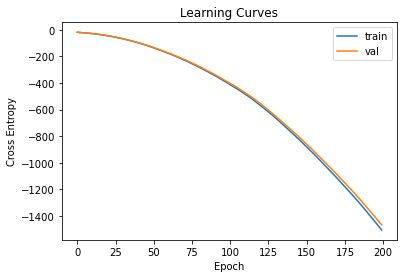

In [40]:
...
# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy: 0.739


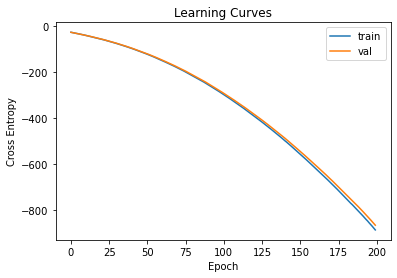

In [43]:
# fit a simple mlp model on the haberman and review learning curves
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot
# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.csv'
df = read_csv(path, header=None)
# split into input and output columns
# ensure all data are floating point values
X = dataframe.drop(['class'], axis=1)
y = dataframe.drop(['age','year','nodes'], axis=1)
y = LabelEncoder().fit_transform(y)
X, y = df.values[:, :-1], df.values[:, -1]
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=3)
# determine the number of input features
n_features = X.shape[1]
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')
# fit the model
history = model.fit(X_train, y_train, epochs=200, batch_size=16, verbose=0, validation_data=(X_test,y_test))
# predict test set
yhat = model.predict(X_test)
# evaluate predictions
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)
# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

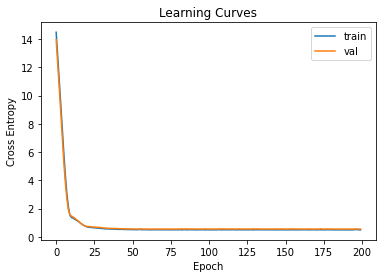

In [44]:
# fit a simple mlp model on the haberman and review learning curves
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot
# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.csv'
df = read_csv(path, header=None)
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# ensure all data are floating point values
X = X.astype('float32')
# encode strings to integer
y = LabelEncoder().fit_transform(y)
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=3)
# determine the number of input features
n_features = X.shape[1]
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')
# fit the model
history = model.fit(X_train, y_train, epochs=200, batch_size=16, verbose=0, validation_data=(X_test,y_test))
# predict test set
yhat = model.predict(X_test)
# evaluate predictions
# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()